In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

In [66]:
#print the first five rows fo train data
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [67]:
#print the first five rows of test data
test_df.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [68]:
#check the shape of the train data
train_df.shape

(7613, 5)

In [69]:
#check the shape of the test data
test_df.shape

(3263, 4)

In [70]:
#check the datatypes of train  data
train_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [71]:
#check the datatypes of trest data
test_df.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [72]:
#check the null values for train data
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [73]:
#check the null values for test data
test_df.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Based on the Above data we find that some columns are unnecessary.So we need to remove that columns

In [11]:
#Final train data
final_train_df = train_df.drop(columns = ['keyword','location'],axis = 1)
final_test_df = test_df.drop(columns = ['keyword','location'],axis = 1)

In [12]:
#print the frist five rows of final train data
final_train_df.head(5)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [74]:
#print the frist five rows of final test data
final_test_df.head(5)

,id,text,text_preprocessed
0,0,Just happened a terrible car crash,happened terrible car crash
1,2,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,3,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 china taiwan


In [75]:
# Check the distribution of the target
print(final_train_df['target'].value_counts())

0    4342
1    3271
Name: target, dtype: int64


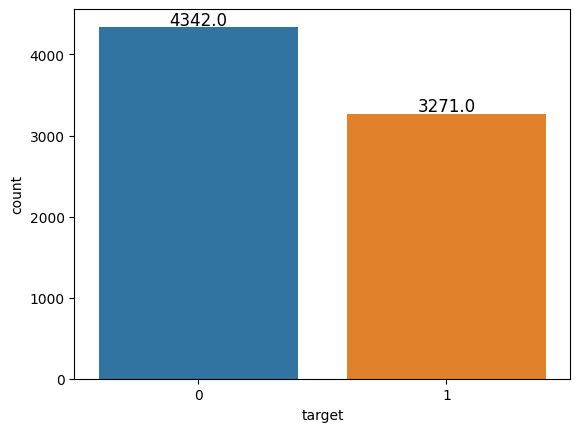

In [15]:
#count plot for train data
ax = sns.countplot(x='target', data=final_train_df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

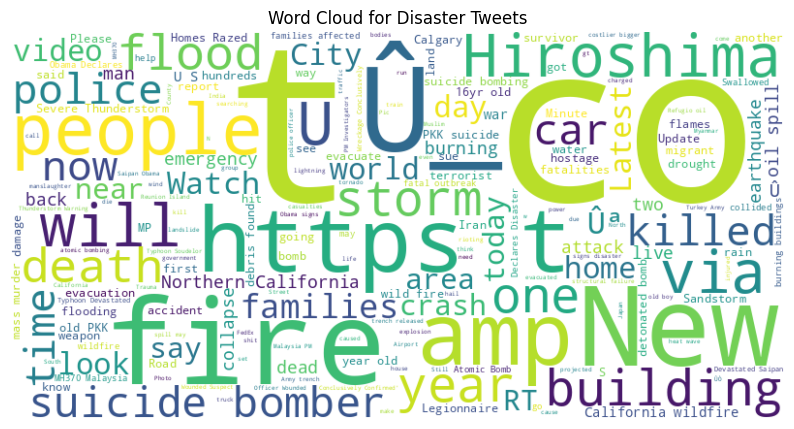

In [16]:
# Generate a word cloud for disaster tweets
from wordcloud import WordCloud
disaster_tweets = final_train_df[final_train_df['target'] == 1]['text']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')
plt.show()

Text Preprocessing

I am doing the text preprocessing for both training and testing data.

1) basic preprocessing like convert upper case into lower case.
2) Removing the Punctuation and special character
3) convert the text into words nothing but tokens
4) Removing the stop words

Using the NLTK Library.

In [76]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    #convert the text into Lower case.
    text = text.lower()
    # Removing punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]
    processed_text = ' '.join(tokens)
    return processed_text

# Apply text preprocessing to the 'text' column in both training and testing datasets
final_train_df['text_preprocessed'] = final_train_df['text'].apply(preprocess_text)
final_test_df['text_preprocessed'] = final_test_df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [77]:
#After the text preprocessing first five rows of train data
final_train_df.head(5)

,id,text,target,text_preprocessed,sentiment
0,1,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us,0.0
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0.1
2,5,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...,-0.1
3,6,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,0.0
4,7,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...,0.0


In [78]:
#After the text preprocessing first five rows of test data
final_test_df.head(5)

,id,text,text_preprocessed
0,0,Just happened a terrible car crash,happened terrible car crash
1,2,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,3,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,9,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 china taiwan


Visualization

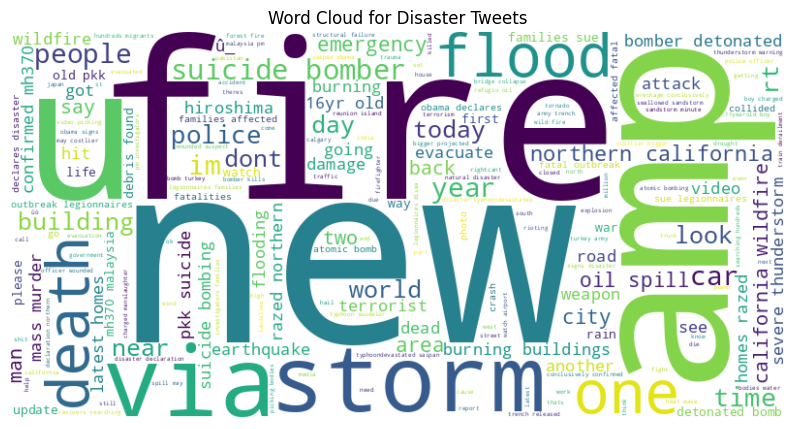

In [79]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for disaster tweets
disaster_tweets = final_train_df[final_train_df['target'] == 1]['text_preprocessed']
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')
plt.show()


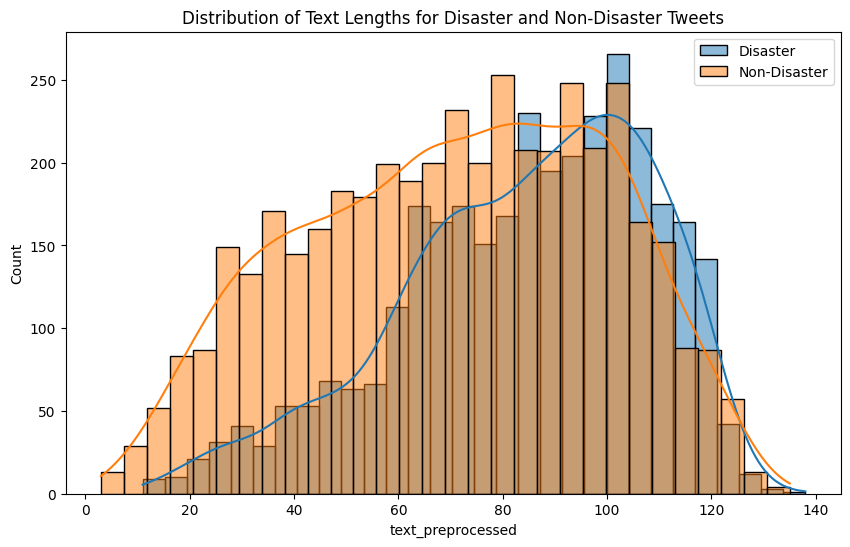

In [80]:
#Tweets Length for both Disater and Non-Diaster Tweets.
plt.figure(figsize=(10, 6))
sns.histplot(final_train_df[final_train_df['target'] == 1]['text_preprocessed'].apply(len), bins=30, kde=True, label='Disaster')
sns.histplot(final_train_df[final_train_df['target'] == 0]['text_preprocessed'].apply(len), bins=30, kde=True, label='Non-Disaster')
plt.title('Distribution of Text Lengths for Disaster and Non-Disaster Tweets')
plt.legend()
plt.show()


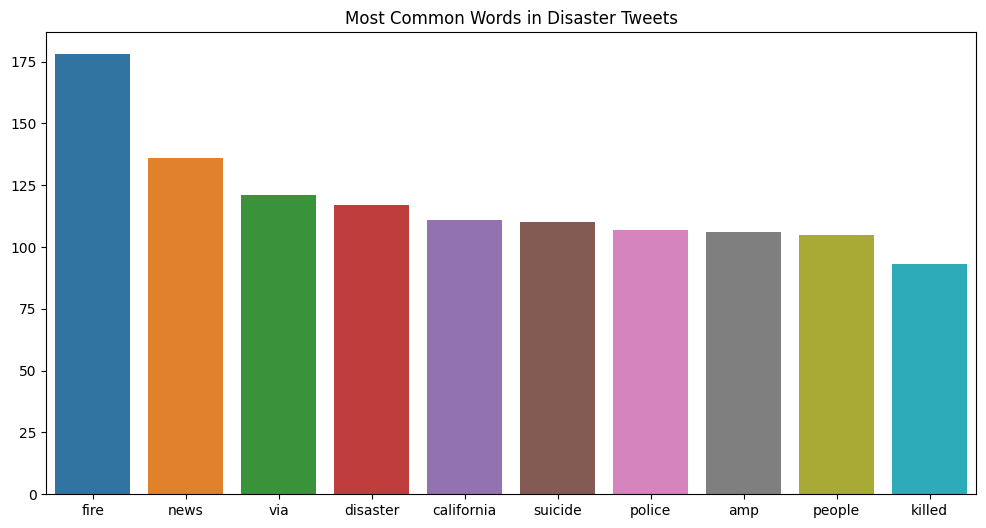

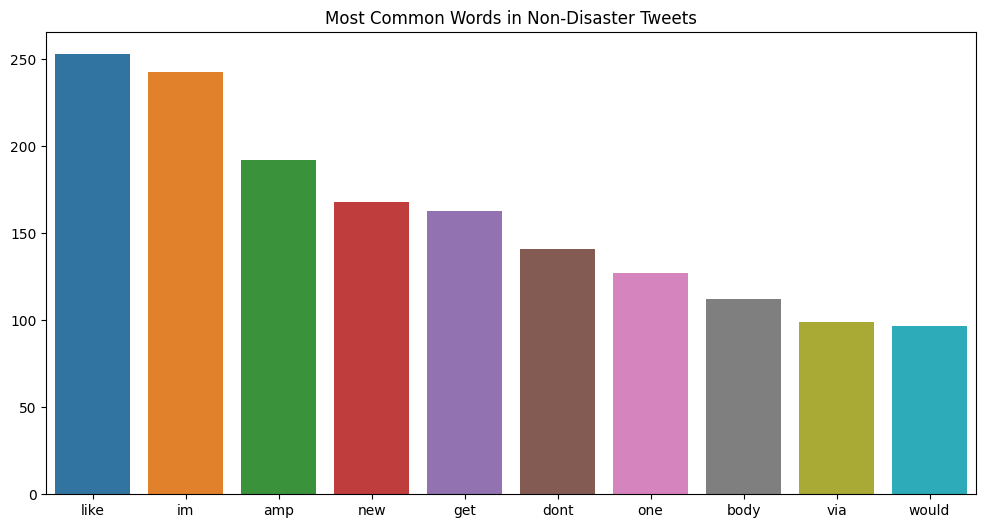

In [81]:
#most common words for disater and non-disater tweets
from collections import Counter

def plot_most_common_words(text_series, title):
    words = ' '.join(text_series).split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
    plt.title(title)
    plt.show()

# Plot most common words in disaster tweets
plot_most_common_words(disaster_tweets, 'Most Common Words in Disaster Tweets')

# Plot most common words in non-disaster tweets
non_disaster_tweets = final_train_df[final_train_df['target'] == 0]['text_preprocessed']
plot_most_common_words(non_disaster_tweets, 'Most Common Words in Non-Disaster Tweets')

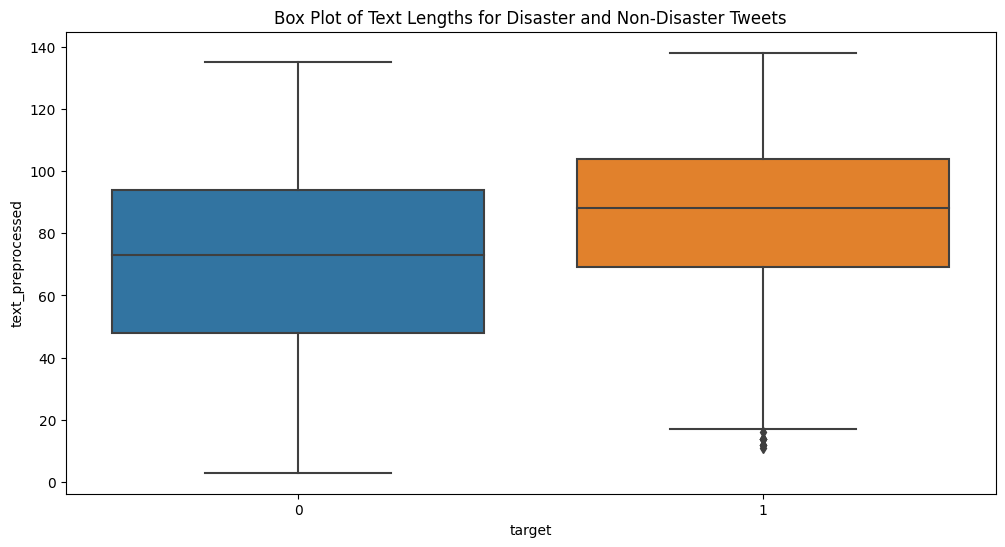

In [82]:
#Text Length for both disasterand Non-disaster tweets
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y=final_train_df['text_preprocessed'].apply(len), data=final_train_df)
plt.title('Box Plot of Text Lengths for Disaster and Non-Disaster Tweets')
plt.show()

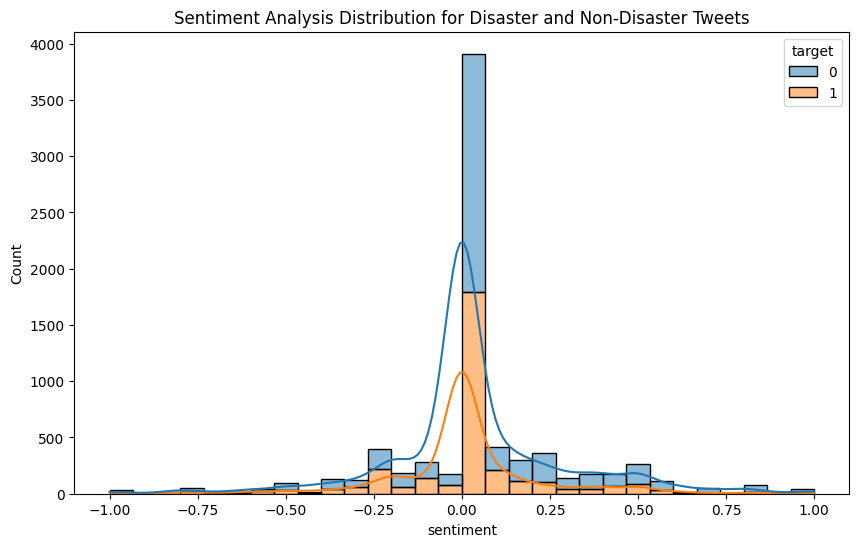

In [83]:
#sentiment analysis for both disaster and non-disaster tweets
from textblob import TextBlob

# Assuming TextBlob is installed
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

final_train_df['sentiment'] = final_train_df['text_preprocessed'].apply(get_sentiment)

plt.figure(figsize=(10, 6))
sns.histplot(final_train_df, x='sentiment', hue='target', bins=30, kde=True, multiple='stack')
plt.title('Sentiment Analysis Distribution for Disaster and Non-Disaster Tweets')
plt.show()


Feature Engineering

Data Split

In [86]:
from sklearn.model_selection import train_test_split

X = final_train_df['text_preprocessed']
#Traget Value
Y = final_train_df['target']

# Split the data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Support Vector Classifier

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import pandas as pd
import pickle


# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
}


pipeline_SVM = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(C=1.0, kernel='rbf', gamma='scale'))
])

pipeline_SVM.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC())])

In [91]:
pipeline_SVM_prediction = pipeline_SVM.predict(X_test)

# Print classification report for the Support Vector Classifier
print("Classification Report for Support Vector Classifier:")
print(classification_report(Y_test, pipeline_SVM_prediction))

# Evaluate using F1 score
f1 = f1_score(Y_test, pipeline_SVM_prediction)
print(f"F1 Score: {f1}")

Classification Report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1318
           1       0.84      0.66      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284

F1 Score: 0.7391555812608444


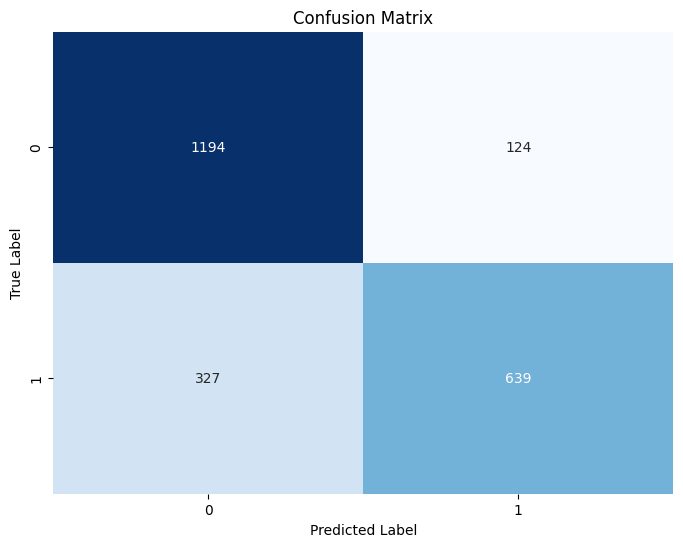

In [92]:
# Confusion Matrix for SVM
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, pipeline_SVM_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Voting Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

pipeline_voting = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('voting', VotingClassifier(estimators=[
        ('gb', GradientBoostingClassifier()),
        ('rf', RandomForestClassifier())
    ], voting='soft'))
])

pipeline_voting.fit(X_train, Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('voting',
                 VotingClassifier(estimators=[('gb',
                                               GradientBoostingClassifier()),
                                              ('rf', RandomForestClassifier())],
                                  voting='soft'))])

In [105]:
pipeline_voting_prediction = pipeline_voting.predict(X_test)

# Print classification report for the Voting Classifier
print("Classification Report for  Voting Classifier:")
print(classification_report(Y_test, pipeline_voting_prediction))

# Evaluate using F1 score
f1 = f1_score(Y_test, pipeline_voting_prediction)
print(f"F1 Score: {f1}")

Classification Report for  Voting Classifier:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      1318
           1       0.82      0.60      0.69       966

    accuracy                           0.78      2284
   macro avg       0.79      0.75      0.76      2284
weighted avg       0.78      0.78      0.77      2284

F1 Score: 0.6948748510131109


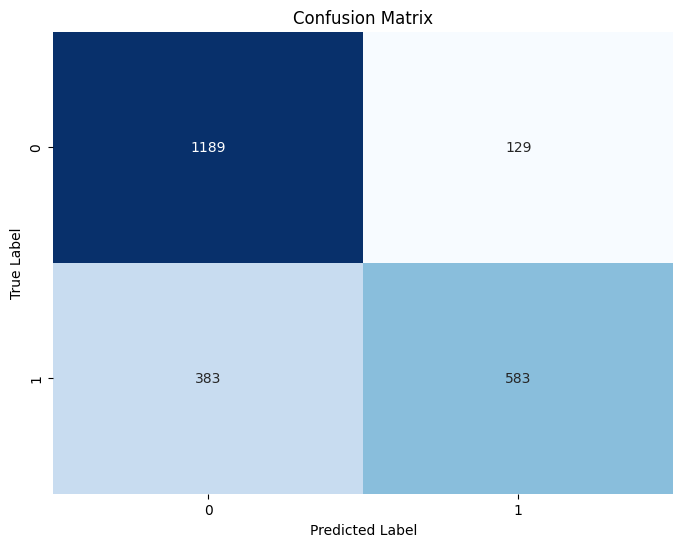

In [106]:
# Confusion Matrix for Voting Classifier
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, pipeline_voting_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Naive Bayes classifier

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline_naive = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Define the parameter grid
param_grid = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'nb__alpha': [0.1, 0.5, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_naive = GridSearchCV(pipeline_naive, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_naive.fit(X_train, Y_train)

# Print the best parameters and their corresponding accuracy
print("Best Parameters: ", grid_search_naive.best_params_)

Best Parameters:  {'nb__alpha': 0.5, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}


In [107]:
pipeline_naive_prediction = grid_search_naive.predict(X_test)

# Print classification report for the Naive Bayes Classifier
print("Classification Report for Naive Bayes Classifier:")
print(classification_report(Y_test, pipeline_naive_prediction))

# Evaluate using F1 score
f1 = f1_score(Y_test, pipeline_naive_prediction)
print(f"F1 Score: {f1}")

Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1318
           1       0.83      0.67      0.74       966

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.79      2284
weighted avg       0.81      0.80      0.80      2284

F1 Score: 0.74052812858783


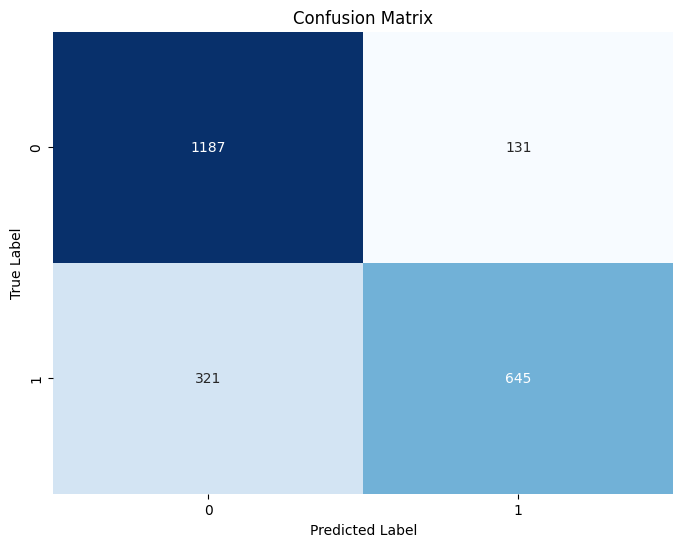

In [108]:
# Confusion Matrix for Naive Bayes Classifier
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, pipeline_naive_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [111]:
from prettytable import PrettyTable

# Data from the provided classification reports
data = {
    "SVM": {
        "Precision (Class 0)": 0.79,
        "Recall (Class 0)": 0.91,
        "F1-Score (Class 0)": 0.84,
        "Precision (Class 1)": 0.84,
        "Recall (Class 1)": 0.66,
        "F1-Score (Class 1)": 0.74,
        "Accuracy": 0.80,
        "Weighted F1-Score": 0.7391555812608444,
    },
    "Voting Classifier": {
        "Precision (Class 0)": 0.76,
        "Recall (Class 0)": 0.90,
        "F1-Score (Class 0)": 0.82,
        "Precision (Class 1)": 0.82,
        "Recall (Class 1)": 0.60,
        "F1-Score (Class 1)": 0.69,
        "Accuracy": 0.78,
        "Weighted F1-Score": 0.6948748510131109,
    },
    "Naive Bayes": {
        "Precision (Class 0)": 0.79,
        "Recall (Class 0)": 0.90,
        "F1-Score (Class 0)": 0.84,
        "Precision (Class 1)": 0.83,
        "Recall (Class 1)": 0.67,
        "F1-Score (Class 1)": 0.74,
        "Accuracy": 0.80,
        "Weighted F1-Score": 0.74052812858783,
    }
}

# Define the table
table = PrettyTable()
table.field_names = ["Classifier", "Precision (Class 0)", "Recall (Class 0)", "F1-Score (Class 0)",
                     "Precision (Class 1)", "Recall (Class 1)", "F1-Score (Class 1)",
                     "Accuracy", "Weighted F1-Score"]

# Add data to the table
for classifier, metrics in data.items():
    table.add_row([classifier,metrics["Precision (Class 0)"],metrics["Recall (Class 0)"],metrics["F1-Score (Class 0)"],metrics["Precision (Class 1)"],metrics["Recall (Class 1)"],metrics["F1-Score (Class 1)"],metrics["Accuracy"],metrics["Weighted F1-Score"]])

# Print the table
print(table)


+-------------------+---------------------+------------------+--------------------+---------------------+------------------+--------------------+----------+--------------------+
|     Classifier    | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Accuracy | Weighted F1-Score  |
+-------------------+---------------------+------------------+--------------------+---------------------+------------------+--------------------+----------+--------------------+
|        SVM        |         0.79        |       0.91       |        0.84        |         0.84        |       0.66       |        0.74        |   0.8    | 0.7391555812608444 |
| Voting Classifier |         0.76        |       0.9        |        0.82        |         0.82        |       0.6        |        0.69        |   0.78   | 0.6948748510131109 |
|    Naive Bayes    |         0.79        |       0.9        |        0.84        |         0.83        |     

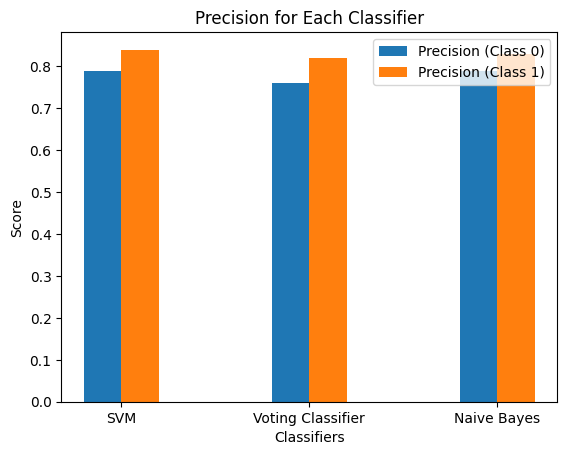

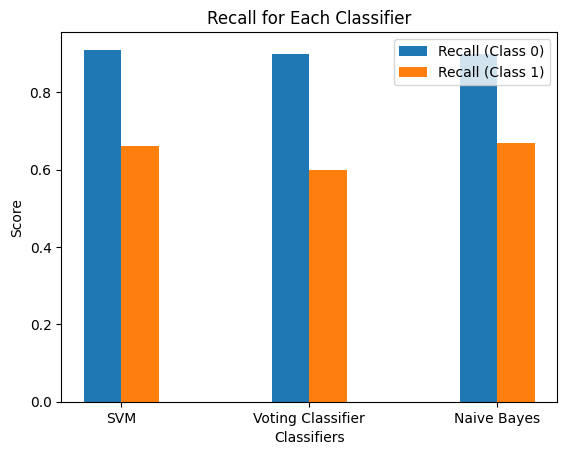

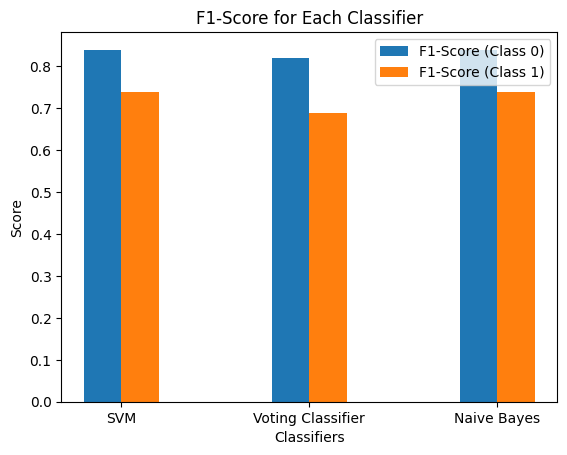

In [112]:
# Classifier names
classifiers = ["SVM", "Voting Classifier", "Naive Bayes"]

# Metrics data
precision_class_0 = [0.79, 0.76, 0.79]
recall_class_0 = [0.91, 0.9, 0.9]
f1_score_class_0 = [0.84, 0.82, 0.84]

precision_class_1 = [0.84, 0.82, 0.83]
recall_class_1 = [0.66, 0.6, 0.67]
f1_score_class_1 = [0.74, 0.69, 0.74]

# Create bar width
bar_width = 0.2
index = np.arange(len(classifiers))

# Plotting precision
plt.bar(index, precision_class_0, width=bar_width, label='Precision (Class 0)')
plt.bar(index + bar_width, precision_class_1, width=bar_width, label='Precision (Class 1)')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Precision for Each Classifier')
plt.xticks(index + bar_width / 2, classifiers)
plt.legend()
plt.show()

# Plotting recall
plt.bar(index, recall_class_0, width=bar_width, label='Recall (Class 0)')
plt.bar(index + bar_width, recall_class_1, width=bar_width, label='Recall (Class 1)')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Recall for Each Classifier')
plt.xticks(index + bar_width / 2, classifiers)
plt.legend()
plt.show()

# Plotting F1-score
plt.bar(index, f1_score_class_0, width=bar_width, label='F1-Score (Class 0)')
plt.bar(index + bar_width, f1_score_class_1, width=bar_width, label='F1-Score (Class 1)')

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('F1-Score for Each Classifier')
plt.xticks(index + bar_width / 2, classifiers)
plt.legend()
plt.show()

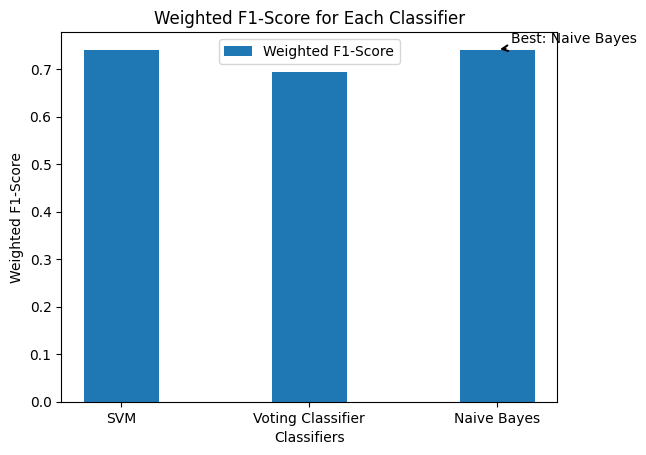

In [113]:
classifiers = ["SVM", "Voting Classifier", "Naive Bayes"]

# Weighted F1-score data
weighted_f1_score = [0.7391, 0.694, 0.7405]

# Find the classifier with the highest weighted F1-score
best_classifier = classifiers[np.argmax(weighted_f1_score)]

# Create bar width
bar_width = 0.4
index = np.arange(len(classifiers))

# Plotting weighted F1-score
plt.bar(index, weighted_f1_score, width=bar_width, label='Weighted F1-Score')
plt.xlabel('Classifiers')
plt.ylabel('Weighted F1-Score')
plt.title('Weighted F1-Score for Each Classifier')
plt.xticks(index, classifiers)
plt.legend()

# Highlight the classifier with the highest weighted F1-score
plt.annotate(f'Best: {best_classifier}',
             xy=(index[np.argmax(weighted_f1_score)], np.max(weighted_f1_score)),
             xytext=(10, 5), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5))

plt.show()

Naive Bayes Got the Highest Weighted F1-Score

SO i am consider Naive bayes Prediction Value

In [114]:
final_test_df['text_preprocessed']

0                             happened terrible car crash
1       heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   apocalypse lighting spokane wildfires
4                  typhoon soudelor kills 28 china taiwan
                              ...                        
3258    earthquake safety los angeles ûò safety fasten...
3259    storm ri worse last hurricane cityamp3others h...
3260      green line derailment chicago httptcoutbxlcbiuy
3261    meg issues hazardous weather outlook hwo httpt...
3262    cityofcalgary activated municipal emergency pl...
Name: text_preprocessed, Length: 3263, dtype: object

In [124]:
final_pred_naive = grid_search_naive.predict(final_test_df['text_preprocessed'])
final_prediction_data = np.where(final_pred_naive > 0.5, 1, 0)

Final Sample Submission

In [125]:
sample_submission = pd.read_csv("sample_submission.csv")
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [127]:
sample_submission['target'] = final_prediction_data
sample_submission.to_csv("Submission.csv", index=False)